<a href="https://colab.research.google.com/github/YahyaHajji/Predictive-Banking-Preprocessing/blob/master/Predictive-Banking-Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# ============================================================================
# TRAVAUX PRATIQUES - ANALYSE EXPLORATOIRE DES DONNÉES (EDA)
# Fichier: clients.csv - Données Bancaires
# Filière Informatique
# ============================================================================

print("=" * 80)
print("TP - ANALYSE EXPLORATOIRE DES DONNÉES (EDA)")
print("Jeu de données: clients.csv")
print("=" * 80)

# ============================================================================
# ÉTAPE 1 : CHARGEMENT ET INSPECTION INITIALE DES DONNÉES
# ============================================================================
print("\n" + "=" * 80)
print("ÉTAPE 1 : CHARGEMENT ET INSPECTION INITIALE DES DONNÉES")
print("=" * 80)

# 1.1 Importer les bibliothèques nécessaires
print("\n[1.1] Importation des bibliothèques...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("✓ Bibliothèques importées!")

# 1.2 Charger le fichier clients.csv
print("\n[1.2] Chargement du fichier clients.csv...")
df = pd.read_csv('/content/clients.csv', sep=';')
print("✓ Fichier chargé!")

# 1.3 Afficher les 5 premières lignes
print("\n[1.3] Les 5 premières lignes:")
print(df.head())

# 1.4 Taille du jeu de données
print(f"\n[1.4] Taille: {df.shape[0]} lignes × {df.shape[1]} colonnes")

# 1.5 Types de données
print("\n[1.5] Types de données:")
print(df.dtypes)

TP - ANALYSE EXPLORATOIRE DES DONNÉES (EDA)
Jeu de données: clients.csv

ÉTAPE 1 : CHARGEMENT ET INSPECTION INITIALE DES DONNÉES

[1.1] Importation des bibliothèques...
✓ Bibliothèques importées!

[1.2] Chargement du fichier clients.csv...
✓ Fichier chargé!

[1.3] Les 5 premières lignes:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226      

In [6]:
# ============================================================================
# ÉTAPE 2 : COMPRÉHENSION DE LA STRUCTURE DES DONNÉES
# ============================================================================
print("\n" + "=" * 80)
print("ÉTAPE 2 : COMPRÉHENSION DE LA STRUCTURE")
print("=" * 80)

# 2.1 Identifier variables quantitatives et qualitatives
variables_quantitatives = df.select_dtypes(include=[np.number]).columns.tolist()
variables_qualitatives = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nVariables quantitatives ({len(variables_quantitatives)}): {variables_quantitatives}")
print(f"Variables qualitatives ({len(variables_qualitatives)}): {variables_qualitatives}")

# 2.2 Résumé général
print("\n[2.2] Résumé:")
print(df.describe())

# 2.3 Vérifier doublons
nb_doublons = df.duplicated().sum()
print(f"\n[2.3] Doublons: {nb_doublons}")
if nb_doublons > 0:
    df = df.drop_duplicates()
    print(f"✓ Doublons supprimés!")

# 2.4 Cohérence
print("\n[2.4] Vérification de cohérence:")
for col in variables_quantitatives:
    print(f"  {col}: Min={df[col].min():.2f}, Max={df[col].max():.2f}")



ÉTAPE 2 : COMPRÉHENSION DE LA STRUCTURE

Variables quantitatives (10): ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Variables qualitatives (11): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

[2.2] Résumé:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.0

In [7]:
# ============================================================================
# ÉTAPE 3 : ANALYSE DES VALEURS MANQUANTES
# ============================================================================
print("\n" + "=" * 80)
print("ÉTAPE 3 : ANALYSE DES VALEURS MANQUANTES")
print("=" * 80)

# 3.1 Calculer valeurs manquantes
valeurs_manquantes = pd.DataFrame({
    'Variable': df.columns,
    'Nombre_Manquant': df.isnull().sum(),
    'Pourcentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print("\n[3.1] Valeurs manquantes:")
print(valeurs_manquantes)

# 3.2 Visualiser
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(df.isnull(), cbar=True, cmap='YlOrRd', yticklabels=False)
    plt.title('Heatmap valeurs manquantes')

    plt.subplot(1, 2, 2)
    missing = df.isnull().sum().sort_values(ascending=False)
    missing = missing[missing > 0]
    plt.barh(missing.index, missing.values, color='coral')
    plt.xlabel('Nombre')
    plt.title('Valeurs manquantes par variable')
    plt.tight_layout()
    plt.savefig('01_valeurs_manquantes.png', dpi=100)
    plt.show()
    print("✓ Visualisation sauvegardée")

# 3.3 Classer par taux
print("\n[3.3] Classement par taux d'absence:")
print(valeurs_manquantes[valeurs_manquantes['Nombre_Manquant'] > 0].sort_values('Pourcentage', ascending=False))

# 3.4 Colonnes is_missing
print("\n[3.4] Création colonnes is_missing:")
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[f'is_missing_{col}'] = df[col].isnull().astype(int)
        print(f"  ✓ is_missing_{col}")

# 3.5 Statistiques
print("\n[3.5] Statistiques par variable:")
statistiques_variables = {}
for col in variables_quantitatives:
    statistiques_variables[col] = {
        'Moyenne': df[col].mean(),
        'Médiane': df[col].median(),
        'Mode': df[col].mode()[0] if len(df[col].mode()) > 0 else np.nan,
        'Écart-type': df[col].std(),
        'Variance': df[col].var()
    }
    print(f"\n{col}:")
    for stat, val in statistiques_variables[col].items():
        print(f"  {stat}: {val:.2f}" if not np.isnan(val) else f"  {stat}: {val}")

print("\nMatrice de covariance:")
print(df[variables_quantitatives].cov().round(3))


ÉTAPE 3 : ANALYSE DES VALEURS MANQUANTES

[3.1] Valeurs manquantes:
                      Variable  Nombre_Manquant  Pourcentage
age                        age                0          0.0
job                        job                0          0.0
marital                marital                0          0.0
education            education                0          0.0
default                default                0          0.0
housing                housing                0          0.0
loan                      loan                0          0.0
contact                contact                0          0.0
month                    month                0          0.0
day_of_week        day_of_week                0          0.0
duration              duration                0          0.0
campaign              campaign                0          0.0
pdays                    pdays                0          0.0
previous              previous                0          0.0
poutcome        

In [8]:
# ============================================================================
# ÉTAPE 4 : IMPUTATION DES VALEURS MANQUANTES
# ============================================================================
print("\n" + "=" * 80)
print("ÉTAPE 4 : IMPUTATION")
print("=" * 80)

df_imputed = df.copy()

# 4.1-4.2 Stratégies
print("\n[4.1-4.2] Stratégies:")
print("  Numériques: MÉDIANE (robuste aux outliers)")
print("  Catégorielles: MODE (plus fréquent)")

# 4.3 Appliquer
print("\n[4.3] Application:")
for col in variables_quantitatives:
    if df_imputed[col].isnull().sum() > 0:
        mediane = df_imputed[col].median()
        df_imputed[col].fillna(mediane, inplace=True)
        print(f"  ✓ {col}: médiane = {mediane:.2f}")

for col in variables_qualitatives:
    if df_imputed[col].isnull().sum() > 0:
        mode = df_imputed[col].mode()[0]
        df_imputed[col].fillna(mode, inplace=True)
        print(f"  ✓ {col}: mode = '{mode}'")

# 4.4 Vérifier
print(f"\n[4.4] Valeurs restantes: {df_imputed.isnull().sum().sum()} ✓")



ÉTAPE 4 : IMPUTATION

[4.1-4.2] Stratégies:
  Numériques: MÉDIANE (robuste aux outliers)
  Catégorielles: MODE (plus fréquent)

[4.3] Application:

[4.4] Valeurs restantes: 0 ✓


In [9]:
# ============================================================================
# ÉTAPE 5 : STATISTIQUES DESCRIPTIVES
# ============================================================================
print("\n" + "=" * 80)
print("ÉTAPE 5 : STATISTIQUES DESCRIPTIVES")
print("=" * 80)

stats_completes = {}
for col in variables_quantitatives:
    stats_completes[col] = {
        'Moyenne': df_imputed[col].mean(),
        'Médiane': df_imputed[col].median(),
        'Mode': df_imputed[col].mode()[0] if len(df_imputed[col].mode()) > 0 else np.nan,
        'Écart-type': df_imputed[col].std(),
        'Variance': df_imputed[col].var(),
        'Minimum': df_imputed[col].min(),
        'Maximum': df_imputed[col].max(),
        'Q1': df_imputed[col].quantile(0.25),
        'Q3': df_imputed[col].quantile(0.75),
        'IQR': df_imputed[col].quantile(0.75) - df_imputed[col].quantile(0.25),
        'Asymétrie': df_imputed[col].skew()
    }

stats_df = pd.DataFrame(stats_completes).T
print("\nStatistiques complètes:")
print(stats_df.round(3))

print("\nInterprétation:")
for col in variables_quantitatives:
    print(f"\n{col}:")
    print(f"  Tendance: Moyenne={stats_completes[col]['Moyenne']:.2f}, Médiane={stats_completes[col]['Médiane']:.2f}")
    print(f"  Dispersion: σ={stats_completes[col]['Écart-type']:.2f}")
    print(f"  Étendue: [{stats_completes[col]['Minimum']:.2f}, {stats_completes[col]['Maximum']:.2f}]")



ÉTAPE 5 : STATISTIQUES DESCRIPTIVES

Statistiques complètes:
                 Moyenne   Médiane      Mode  Écart-type   Variance   Minimum  \
age               40.024    38.000    31.000      10.421    108.591    17.000   
duration         258.316   180.000    85.000     259.305  67239.249     0.000   
campaign           2.568     2.000     1.000       2.770      7.675     1.000   
pdays            962.465   999.000   999.000     186.937  34945.480     0.000   
previous           0.173     0.000     0.000       0.495      0.245     0.000   
emp.var.rate       0.082     1.100     1.400       1.571      2.468    -3.400   
cons.price.idx    93.576    93.749    93.994       0.579      0.335    92.201   
cons.conf.idx    -40.503   -41.800   -36.400       4.628     21.417   -50.800   
euribor3m          3.621     4.857     4.857       1.734      3.008     0.634   
nr.employed     5167.035  5191.000  5228.100      72.251   5220.260  4963.600   

                 Maximum        Q1        Q3  


ÉTAPE 6 : ANALYSE UNIVARIÉE


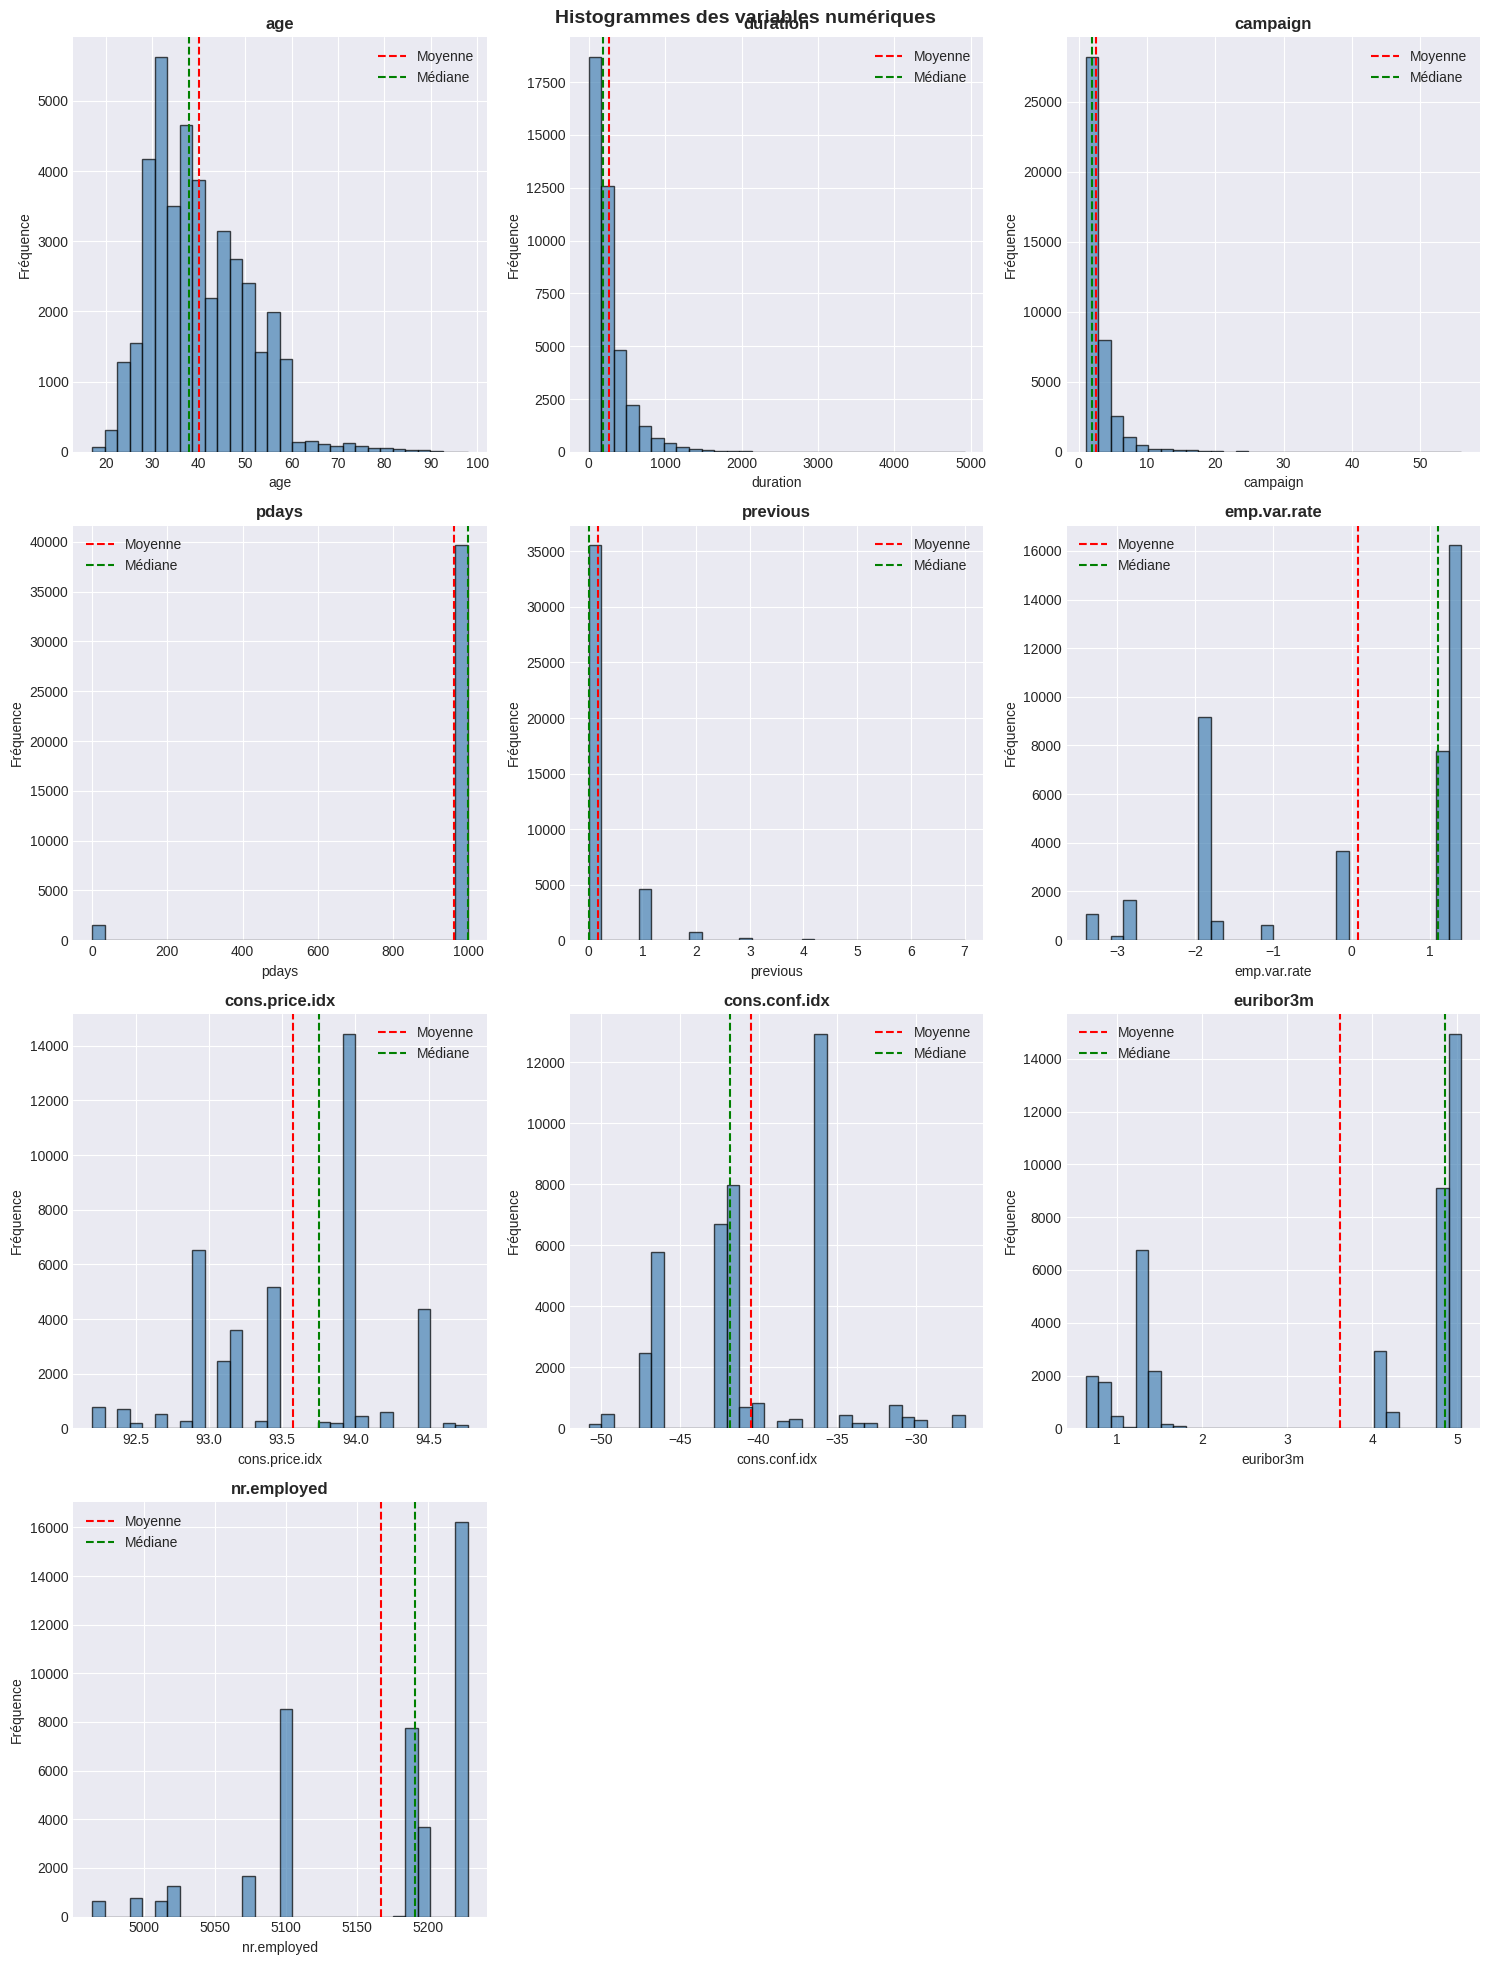

✓ Histogrammes sauvegardés


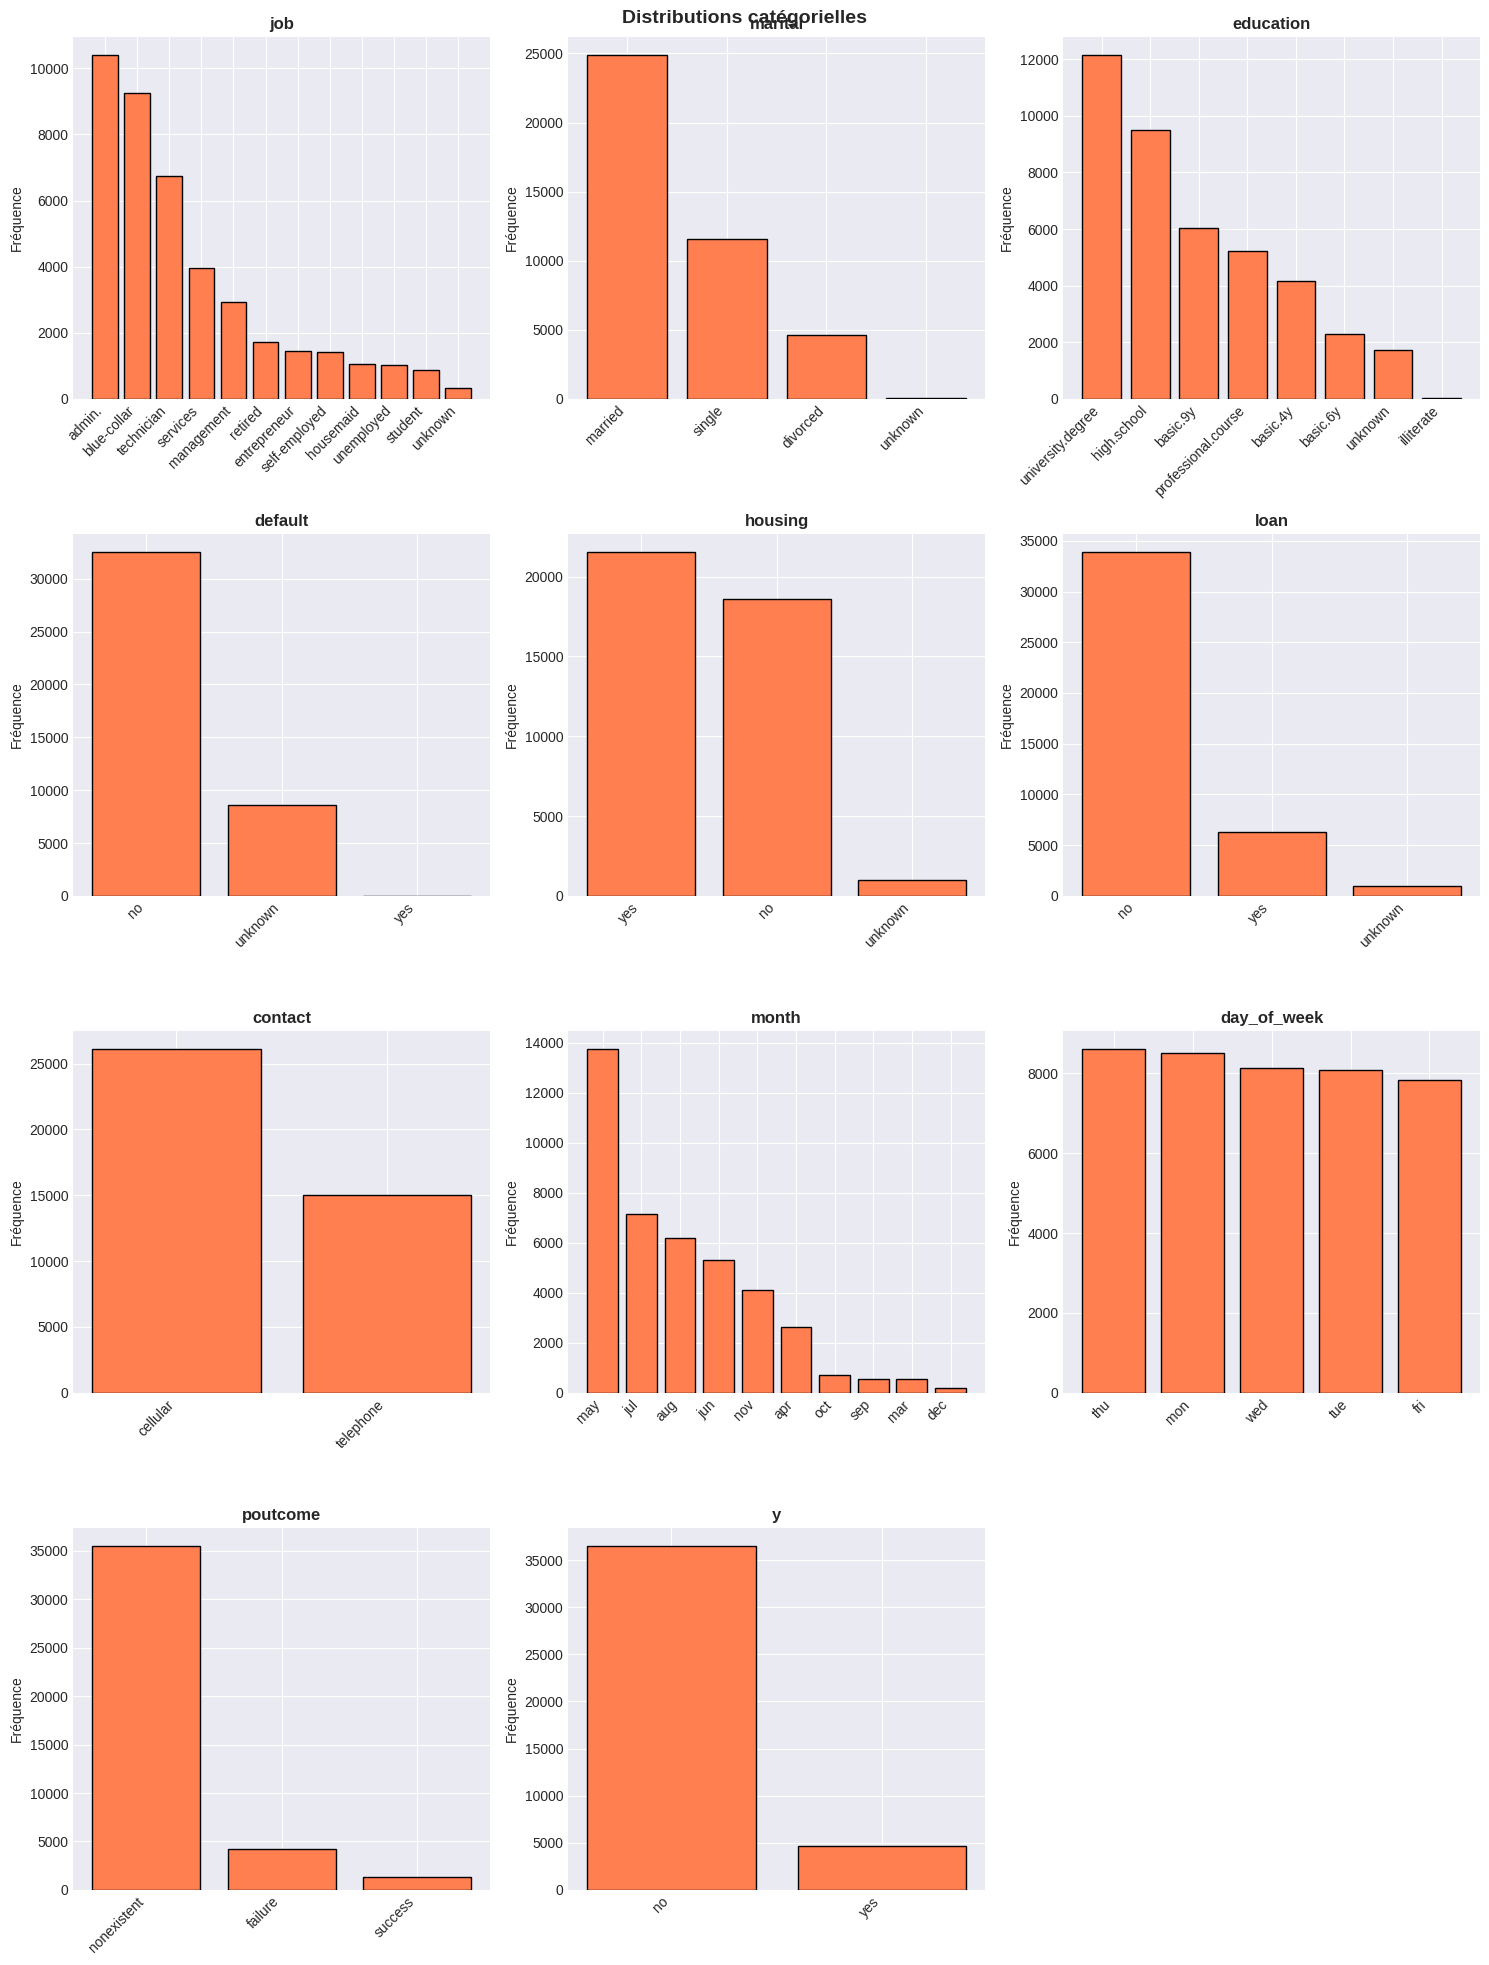

✓ Distributions catégorielles sauvegardées

Analyse des formes:

age: Asymétrie = 0.785
  → Asymétrique à droite

duration: Asymétrie = 3.263
  → Asymétrique à droite

campaign: Asymétrie = 4.762
  → Asymétrique à droite

pdays: Asymétrie = -4.921
  → Asymétrique à gauche

previous: Asymétrie = 3.831
  → Asymétrique à droite

emp.var.rate: Asymétrie = -0.724
  → Asymétrique à gauche

cons.price.idx: Asymétrie = -0.231
  → Symétrique

cons.conf.idx: Asymétrie = 0.303
  → Symétrique

euribor3m: Asymétrie = -0.709
  → Asymétrique à gauche

nr.employed: Asymétrie = -1.044
  → Asymétrique à gauche


In [10]:
# ============================================================================
# ÉTAPE 6 : ANALYSE UNIVARIÉE
# ============================================================================
print("\n" + "=" * 80)
print("ÉTAPE 6 : ANALYSE UNIVARIÉE")
print("=" * 80)

# Histogrammes
n_vars = len(variables_quantitatives)
n_cols = 3
n_rows = (n_vars + 2) // 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.ravel() if n_vars > 1 else [axes]

for idx, col in enumerate(variables_quantitatives):
    axes[idx].hist(df_imputed[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Fréquence')
    axes[idx].axvline(df_imputed[col].mean(), color='red', linestyle='--', label='Moyenne')
    axes[idx].axvline(df_imputed[col].median(), color='green', linestyle='--', label='Médiane')
    axes[idx].legend()

for i in range(n_vars, len(axes)):
    axes[i].axis('off')

plt.suptitle('Histogrammes des variables numériques', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('02_histogrammes.png', dpi=100)
plt.show()
print("✓ Histogrammes sauvegardés")

# Variables catégorielles
if len(variables_qualitatives) > 0:
    n_cat = len(variables_qualitatives)
    n_rows_cat = (n_cat + 2) // 3

    fig, axes = plt.subplots(n_rows_cat, 3, figsize=(15, 5 * n_rows_cat))
    axes = axes.ravel() if n_cat > 1 else [axes]

    for idx, col in enumerate(variables_qualitatives):
        vc = df_imputed[col].value_counts()
        axes[idx].bar(range(len(vc)), vc.values, color='coral', edgecolor='black')
        axes[idx].set_xticks(range(len(vc)))
        axes[idx].set_xticklabels(vc.index, rotation=45, ha='right')
        axes[idx].set_title(f'{col}', fontweight='bold')
        axes[idx].set_ylabel('Fréquence')

    for i in range(n_cat, len(axes)):
        axes[i].axis('off')

    plt.suptitle('Distributions catégorielles', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('03_categorielles.png', dpi=100)
    plt.show()
    print("✓ Distributions catégorielles sauvegardées")

# Analyse forme
print("\nAnalyse des formes:")
for col in variables_quantitatives:
    skew = df_imputed[col].skew()
    print(f"\n{col}: Asymétrie = {skew:.3f}")
    if abs(skew) < 0.5:
        print("  → Symétrique")
    elif skew > 0:
        print("  → Asymétrique à droite")
    else:
        print("  → Asymétrique à gauche")


ÉTAPE 7 : DÉTECTION DES OUTLIERS


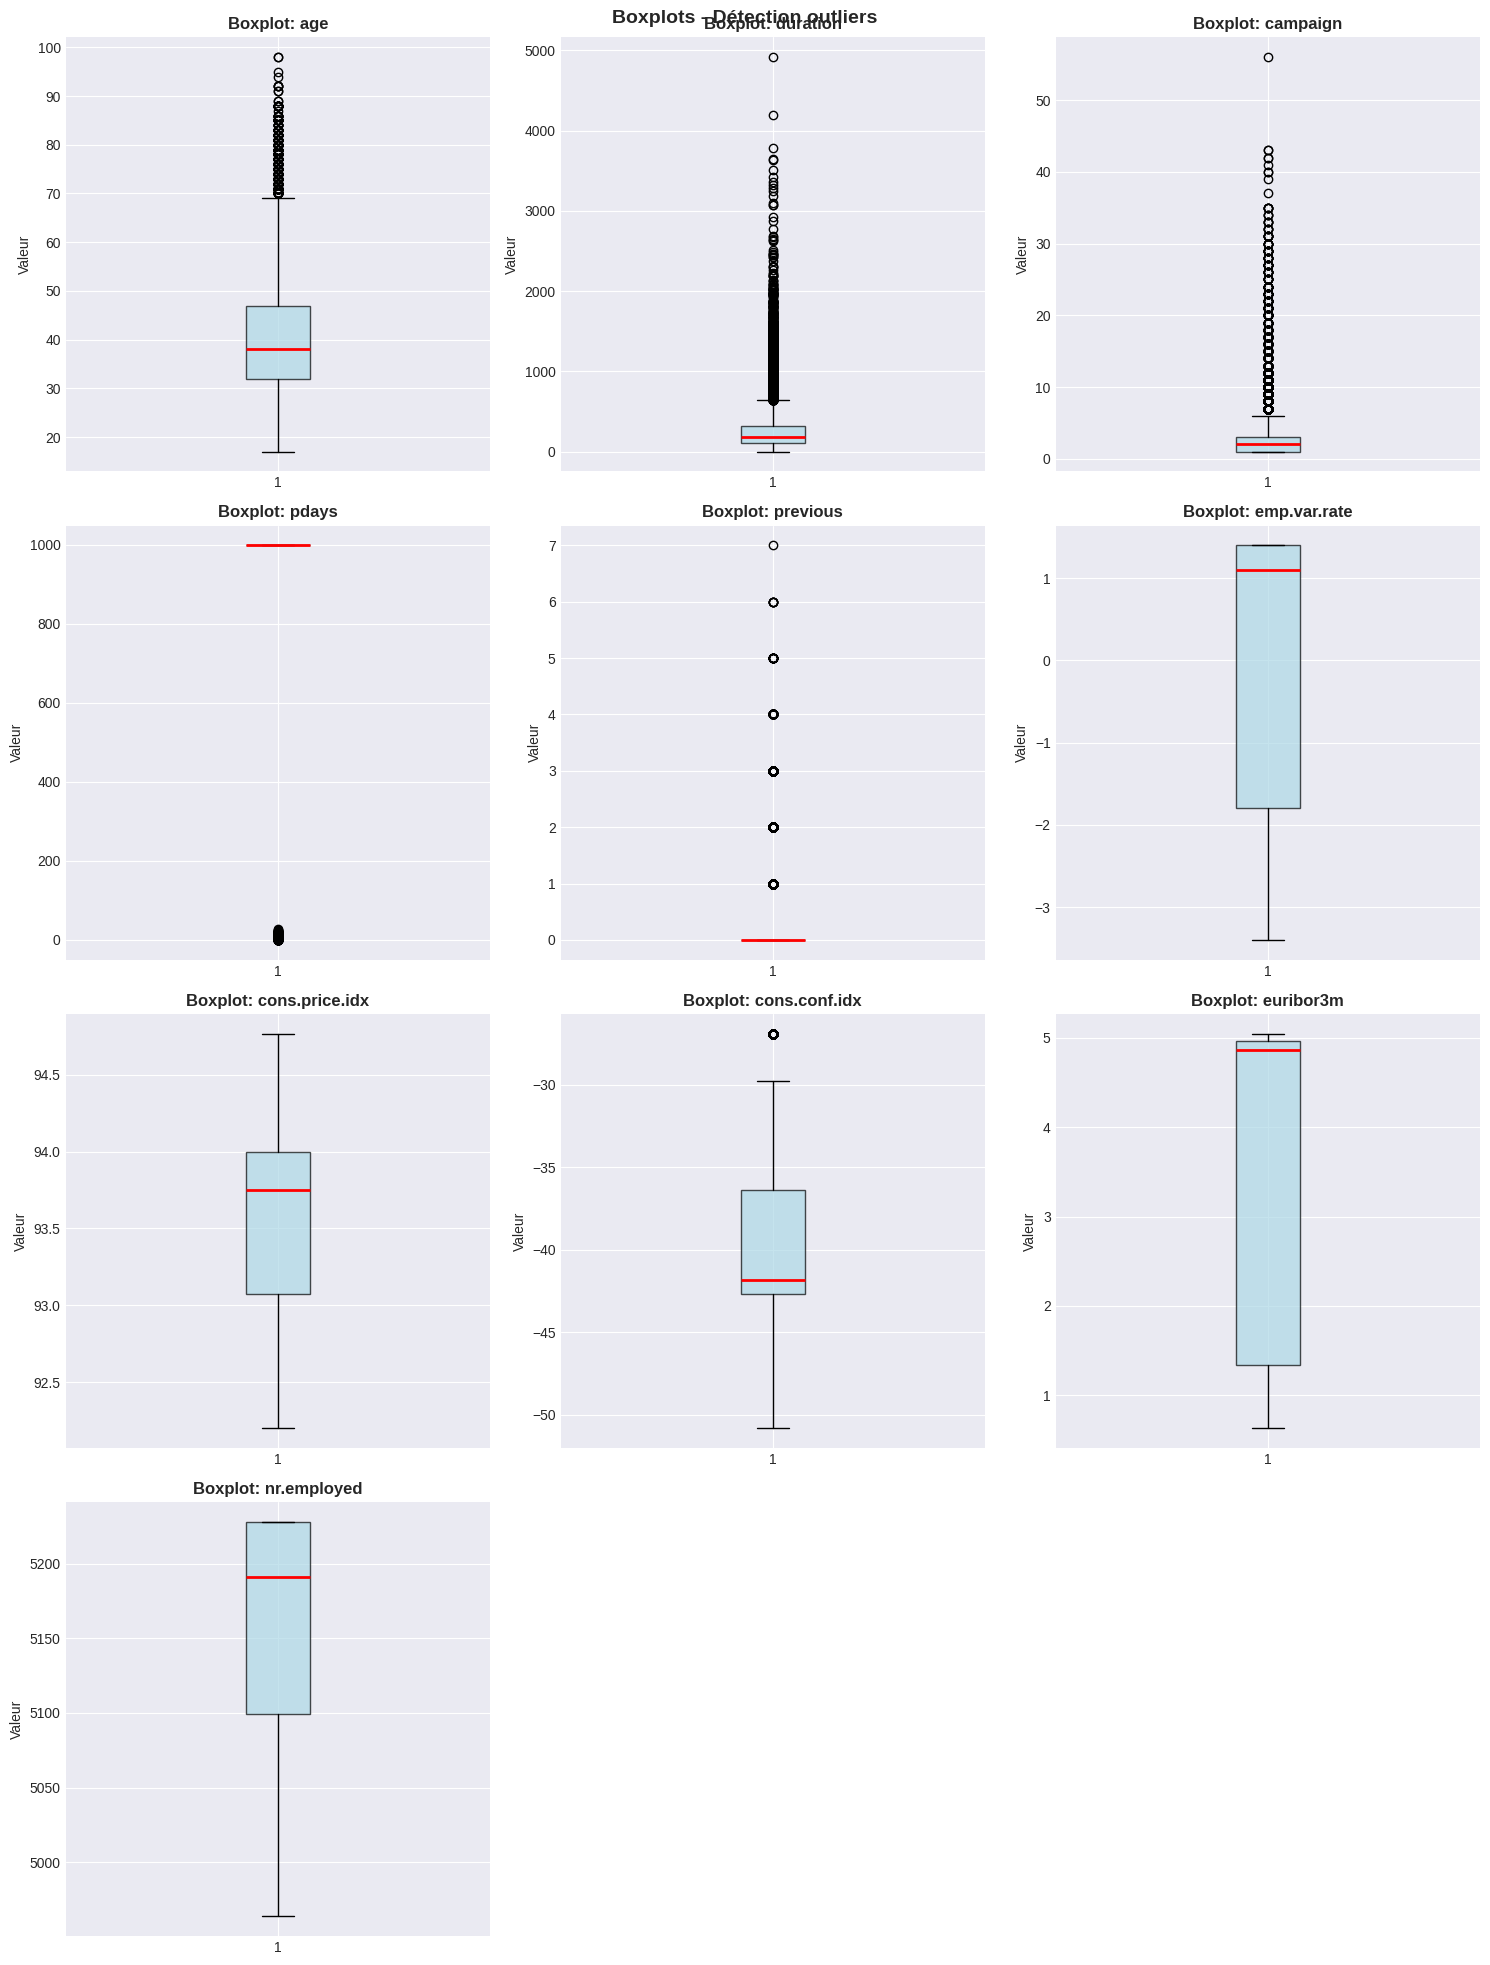

✓ Boxplots sauvegardés

Outliers détectés:
  age: 468 outliers (1.14%)
  duration: 2963 outliers (7.20%)
  campaign: 2406 outliers (5.84%)
  pdays: 1515 outliers (3.68%)
  previous: 5625 outliers (13.66%)
  emp.var.rate: 0 outliers (0.00%)
  cons.price.idx: 0 outliers (0.00%)
  cons.conf.idx: 446 outliers (1.08%)
  euribor3m: 0 outliers (0.00%)
  nr.employed: 0 outliers (0.00%)


In [11]:
# ============================================================================
# ÉTAPE 7 : DÉTECTION DES OUTLIERS
# ============================================================================
print("\n" + "=" * 80)
print("ÉTAPE 7 : DÉTECTION DES OUTLIERS")
print("=" * 80)

# Boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.ravel() if n_vars > 1 else [axes]

outliers_info = {}

for idx, col in enumerate(variables_quantitatives):
    axes[idx].boxplot(df_imputed[col], patch_artist=True,
                      boxprops=dict(facecolor='lightblue', alpha=0.7),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'Boxplot: {col}', fontweight='bold')
    axes[idx].set_ylabel('Valeur')

    # Calculer outliers
    Q1 = df_imputed[col].quantile(0.25)
    Q3 = df_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR

    outliers = ((df_imputed[col] < borne_inf) | (df_imputed[col] > borne_sup)).sum()
    outliers_info[col] = {
        'IQR': IQR,
        'Borne_inf': borne_inf,
        'Borne_sup': borne_sup,
        'Nombre': outliers,
        'Pourcentage': (outliers / len(df_imputed) * 100)
    }

for i in range(n_vars, len(axes)):
    axes[i].axis('off')

plt.suptitle('Boxplots - Détection outliers', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('04_boxplots.png', dpi=100)
plt.show()
print("✓ Boxplots sauvegardés")

print("\nOutliers détectés:")
for col, info in outliers_info.items():
    print(f"  {col}: {info['Nombre']} outliers ({info['Pourcentage']:.2f}%)")



ÉTAPE 8 : TRAITEMENT DES OUTLIERS

Méthode choisie: WINSORISATION
Justification: Préserve les données, adapté au contexte bancaire
  ✓ age: Plafonnement [9.50, 69.50]
  ✓ duration: Plafonnement [-223.50, 644.50]
  ✓ campaign: Plafonnement [-2.00, 6.00]
  ✓ pdays: Plafonnement [999.00, 999.00]
  ✓ previous: Plafonnement [0.00, 0.00]
  ✓ emp.var.rate: Plafonnement [-6.60, 6.20]
  ✓ cons.price.idx: Plafonnement [91.70, 95.37]
  ✓ cons.conf.idx: Plafonnement [-52.15, -26.95]
  ✓ euribor3m: Plafonnement [-4.08, 10.39]
  ✓ nr.employed: Plafonnement [4905.60, 5421.60]


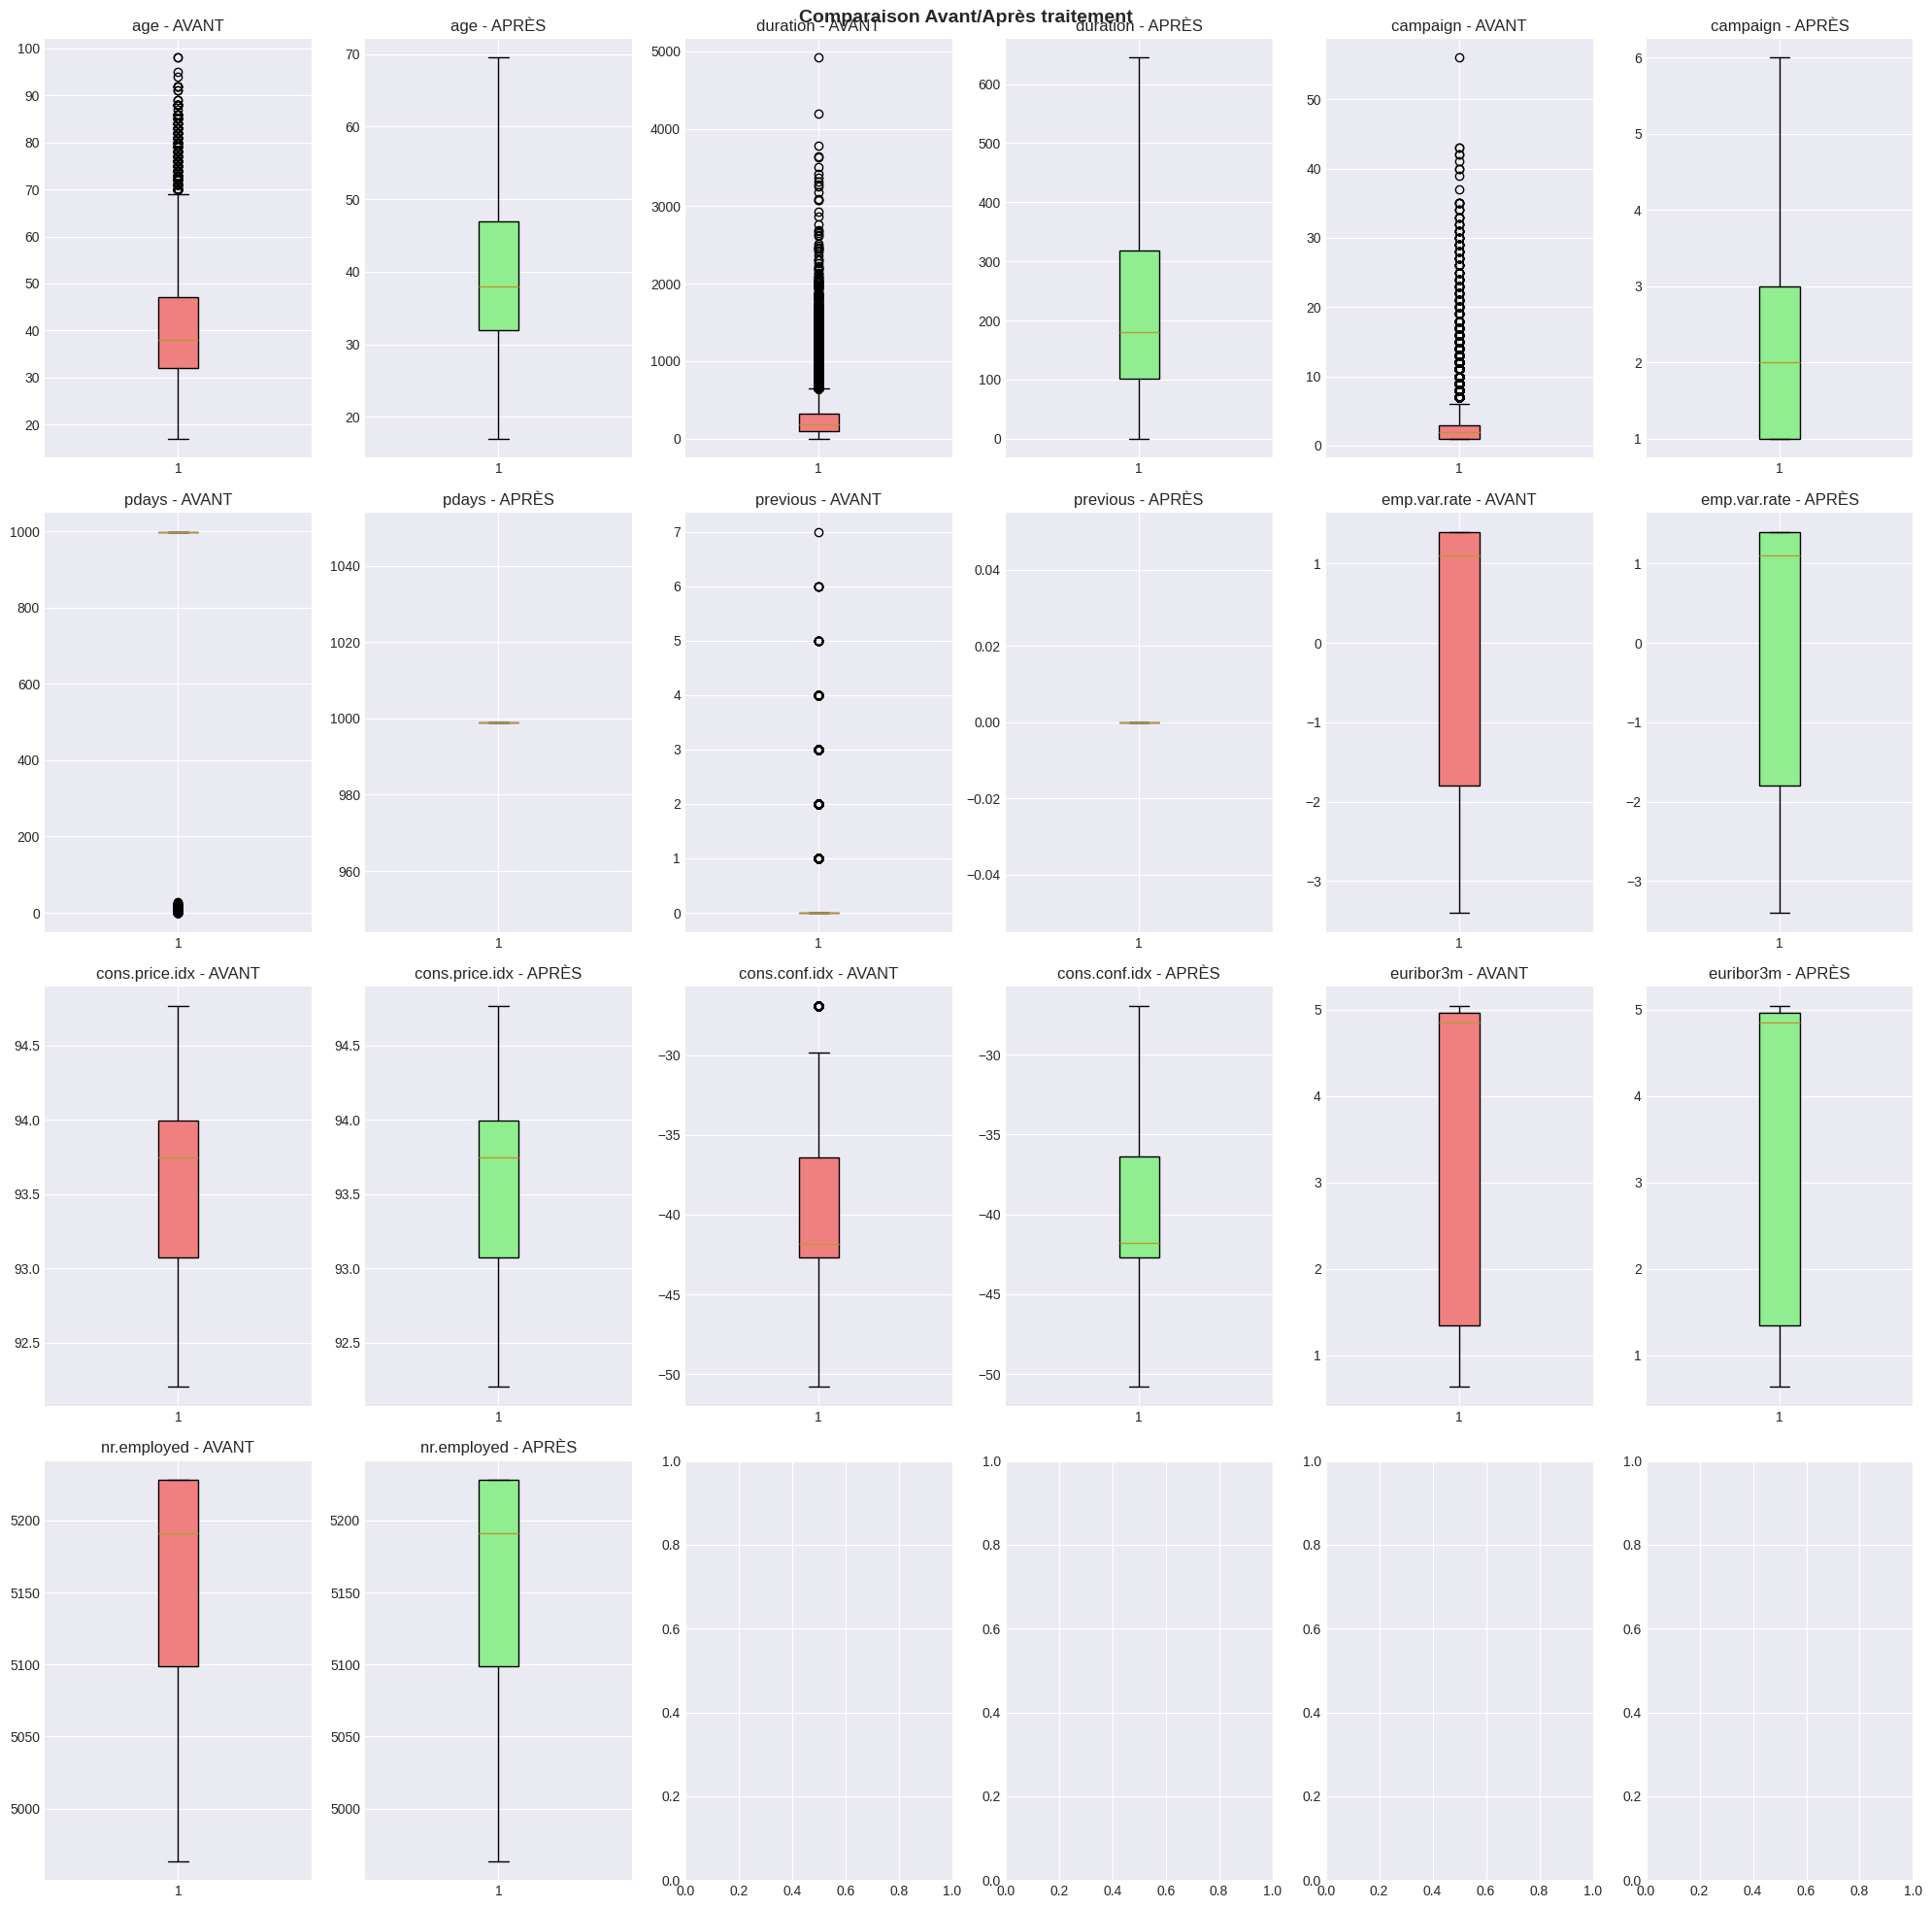

✓ Comparaison sauvegardée


In [12]:
# ============================================================================
# ÉTAPE 8 : TRAITEMENT DES OUTLIERS
# ============================================================================
print("\n" + "=" * 80)
print("ÉTAPE 8 : TRAITEMENT DES OUTLIERS")
print("=" * 80)

print("\nMéthode choisie: WINSORISATION")
print("Justification: Préserve les données, adapté au contexte bancaire")

df_treated = df_imputed.copy()

for col in variables_quantitatives:
    Q1 = df_treated[col].quantile(0.25)
    Q3 = df_treated[col].quantile(0.75)
    IQR = Q3 - Q1
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR

    df_treated[col] = df_treated[col].clip(borne_inf, borne_sup)
    print(f"  ✓ {col}: Plafonnement [{borne_inf:.2f}, {borne_sup:.2f}]")

# Comparaison avant/après
fig, axes = plt.subplots(n_rows, n_cols * 2, figsize=(20, 5 * n_rows))

for idx, col in enumerate(variables_quantitatives):
    # Avant
    ax1 = plt.subplot(n_rows, n_cols * 2, idx * 2 + 1)
    ax1.boxplot(df_imputed[col], patch_artist=True, boxprops=dict(facecolor='lightcoral'))
    ax1.set_title(f'{col} - AVANT')

    # Après
    ax2 = plt.subplot(n_rows, n_cols * 2, idx * 2 + 2)
    ax2.boxplot(df_treated[col], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    ax2.set_title(f'{col} - APRÈS')

plt.suptitle('Comparaison Avant/Après traitement', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('05_comparaison_outliers.png', dpi=100)
plt.show()
print("✓ Comparaison sauvegardée")

In [13]:
# ============================================================================
# ÉTAPE 9 : TRANSFORMATION DES VARIABLES
# ============================================================================
print("\n" + "=" * 80)
print("ÉTAPE 9 : TRANSFORMATION")
print("=" * 80)

df_transformed = df_treated.copy()

print("\nAnalyse asymétrie:")
for col in variables_quantitatives:
    skew = df_transformed[col].skew()
    print(f"\n{col}: Asymétrie = {skew:.3f}")

    if skew > 1 and (df_transformed[col] > 0).all():
        df_transformed[col] = np.log1p(df_transformed[col])
        print(f"  ✓ Transformation LOG appliquée")
    else:
        print(f"  → Pas de transformation nécessaire")



ÉTAPE 9 : TRANSFORMATION

Analyse asymétrie:

age: Asymétrie = 0.567
  → Pas de transformation nécessaire

duration: Asymétrie = 1.045
  → Pas de transformation nécessaire

campaign: Asymétrie = 1.212
  ✓ Transformation LOG appliquée

pdays: Asymétrie = 0.000
  → Pas de transformation nécessaire

previous: Asymétrie = 0.000
  → Pas de transformation nécessaire

emp.var.rate: Asymétrie = -0.724
  → Pas de transformation nécessaire

cons.price.idx: Asymétrie = -0.231
  → Pas de transformation nécessaire

cons.conf.idx: Asymétrie = 0.301
  → Pas de transformation nécessaire

euribor3m: Asymétrie = -0.709
  → Pas de transformation nécessaire

nr.employed: Asymétrie = -1.044
  → Pas de transformation nécessaire


In [14]:
# ============================================================================
# ÉTAPE 10 : ENCODAGE DES VARIABLES CATÉGORIELLES
# ============================================================================
print("\n" + "=" * 80)
print("ÉTAPE 10 : ENCODAGE")
print("=" * 80)

df_encoded = df_transformed.copy()

# Supprimer colonnes is_missing
cols_missing = [c for c in df_encoded.columns if c.startswith('is_missing_')]
if cols_missing:
    df_encoded = df_encoded.drop(columns=cols_missing)

print("\nMéthode: One-Hot Encoding")
print("Justification: Variables nominales sans ordre")

for col in variables_qualitatives:
    print(f"\n{col}: {df_encoded[col].nunique()} catégories")
    dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
    df_encoded = pd.concat([df_encoded, dummies], axis=1)
    df_encoded = df_encoded.drop(columns=[col])
    print(f"  ✓ {len(dummies.columns)} variables binaires créées")

print(f"\nNouvelle forme: {df_encoded.shape}")



ÉTAPE 10 : ENCODAGE

Méthode: One-Hot Encoding
Justification: Variables nominales sans ordre

job: 12 catégories
  ✓ 11 variables binaires créées

marital: 4 catégories
  ✓ 3 variables binaires créées

education: 8 catégories
  ✓ 7 variables binaires créées

default: 3 catégories
  ✓ 2 variables binaires créées

housing: 3 catégories
  ✓ 2 variables binaires créées

loan: 3 catégories
  ✓ 2 variables binaires créées

contact: 2 catégories
  ✓ 1 variables binaires créées

month: 10 catégories
  ✓ 9 variables binaires créées

day_of_week: 5 catégories
  ✓ 4 variables binaires créées

poutcome: 3 catégories
  ✓ 2 variables binaires créées

y: 2 catégories
  ✓ 1 variables binaires créées

Nouvelle forme: (41176, 54)



ÉTAPE 11 : NORMALISATION

Méthode: StandardScaler (Z-score)
Formule: (X - μ) / σ
Résultat: μ=0, σ=1

Avant normalisation:
             age   duration   campaign    pdays  previous  emp.var.rate  \
count  41176.000  41176.000  41176.000  41176.0   41176.0     41176.000   
mean      39.939    235.021      1.092    999.0       0.0         0.082   
std       10.129    177.366      0.419      0.0       0.0         1.571   
min       17.000      0.000      0.693    999.0       0.0        -3.400   
25%       32.000    102.000      0.693    999.0       0.0        -1.800   
50%       38.000    180.000      1.099    999.0       0.0         1.100   
75%       47.000    319.000      1.386    999.0       0.0         1.400   
max       69.500    644.500      1.946    999.0       0.0         1.400   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
count       41176.000      41176.000  41176.000    41176.000  
mean           93.576        -40.503      3.621     5167.035  
std         

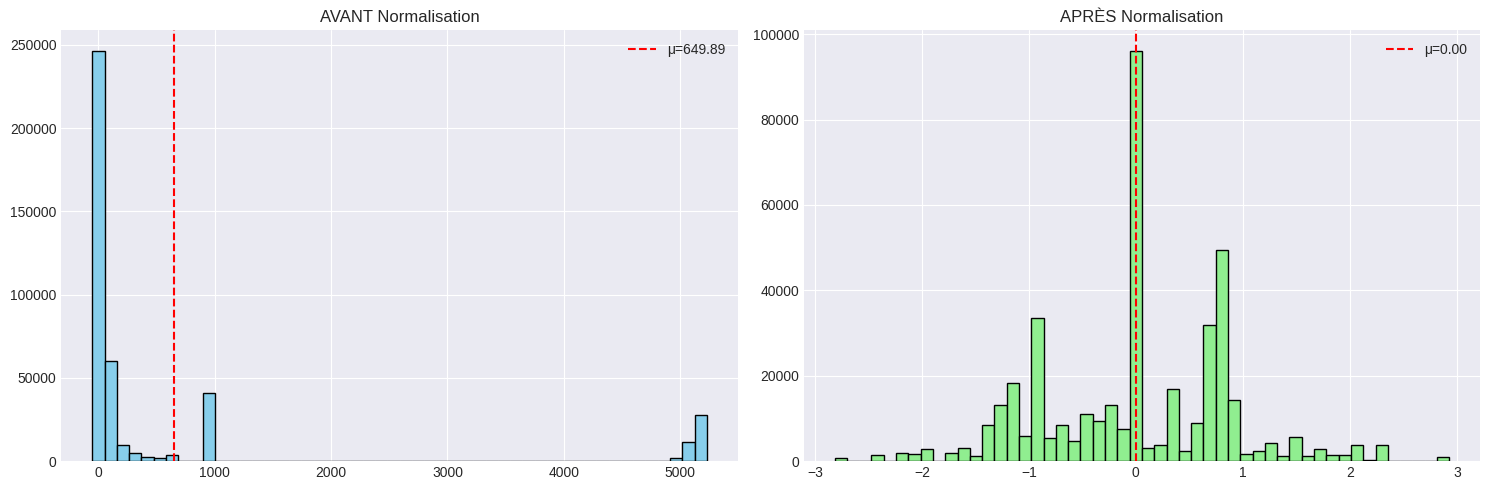

✓ Visualisation sauvegardée


In [15]:
# ============================================================================
# ÉTAPE 11 : NORMALISATION
# ============================================================================
print("\n" + "=" * 80)
print("ÉTAPE 11 : NORMALISATION")
print("=" * 80)

numeric_cols_final = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

print("\nMéthode: StandardScaler (Z-score)")
print("Formule: (X - μ) / σ")
print("Résultat: μ=0, σ=1")

scaler = StandardScaler()
df_normalized = df_encoded.copy()
df_normalized[numeric_cols_final] = scaler.fit_transform(df_encoded[numeric_cols_final])

print("\nAvant normalisation:")
print(df_encoded[numeric_cols_final].describe().round(3))

print("\nAprès normalisation:")
print(df_normalized[numeric_cols_final].describe().round(3))

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

data_before = df_encoded[numeric_cols_final].values.flatten()
ax1.hist(data_before, bins=50, color='skyblue', edgecolor='black')
ax1.set_title('AVANT Normalisation')
ax1.axvline(data_before.mean(), color='red', linestyle='--', label=f'μ={data_before.mean():.2f}')
ax1.legend()

data_after = df_normalized[numeric_cols_final].values.flatten()
ax2.hist(data_after, bins=50, color='lightgreen', edgecolor='black')
ax2.set_title('APRÈS Normalisation')
ax2.axvline(data_after.mean(), color='red', linestyle='--', label=f'μ={data_after.mean():.2f}')
ax2.legend()

plt.tight_layout()
plt.savefig('06_normalisation.png', dpi=100)
plt.show()
print("✓ Visualisation sauvegardée")

In [16]:
# ============================================================================
# ÉTAPE 12 : SAUVEGARDE
# ============================================================================
print("\n" + "=" * 80)
print("ÉTAPE 12 : SAUVEGARDE")
print("=" * 80)

output_file = 'clients_cleaned.csv'
df_normalized.to_csv(output_file, index=False)
print(f"\n✓ Fichier sauvegardé: {output_file}")
print(f"  Dimensions: {df_normalized.shape[0]} lignes × {df_normalized.shape[1]} colonnes")



ÉTAPE 12 : SAUVEGARDE

✓ Fichier sauvegardé: clients_cleaned.csv
  Dimensions: 41176 lignes × 54 colonnes


In [17]:
# ============================================================================
# ÉTAPE 13 : SYNTHÈSE
# ============================================================================
print("\n" + "=" * 80)
print("ÉTAPE 13 : SYNTHÈSE ET INTERPRÉTATION")
print("=" * 80)

print("\n📊 OBSERVATIONS PRINCIPALES:")
print(f"  • Dataset initial: {df.shape[0]} observations, {df.shape[1]} variables")
print(f"  • Valeurs manquantes traitées par imputation")
print(f"  • Outliers traités par winsorisation")
print(f"  • Variables transformées et normalisées")
print(f"  • Dataset final: {df_normalized.shape[0]} observations, {df_normalized.shape[1]} variables")

print("\n📈 VARIABLES IMPORTANTES:")
for col in variables_quantitatives:
    skew = stats_completes[col]['Asymétrie']
    print(f"  • {col}: Asymétrie={skew:.2f}, IQR={stats_completes[col]['IQR']:.2f}")

print("\n🎯 IMPACT DU NETTOYAGE:")
print("  • Données complètes (0% manquant)")
print("  • Outliers réduits (préservation des observations)")
print("  • Distributions normalisées")
print("  • Variables encodées (prêtes pour ML)")
print("  • Échelle standardisée (μ=0, σ=1)")



ÉTAPE 13 : SYNTHÈSE ET INTERPRÉTATION

📊 OBSERVATIONS PRINCIPALES:
  • Dataset initial: 41176 observations, 21 variables
  • Valeurs manquantes traitées par imputation
  • Outliers traités par winsorisation
  • Variables transformées et normalisées
  • Dataset final: 41176 observations, 54 variables

📈 VARIABLES IMPORTANTES:
  • age: Asymétrie=0.78, IQR=15.00
  • duration: Asymétrie=3.26, IQR=217.00
  • campaign: Asymétrie=4.76, IQR=2.00
  • pdays: Asymétrie=-4.92, IQR=0.00
  • previous: Asymétrie=3.83, IQR=0.00
  • emp.var.rate: Asymétrie=-0.72, IQR=3.20
  • cons.price.idx: Asymétrie=-0.23, IQR=0.92
  • cons.conf.idx: Asymétrie=0.30, IQR=6.30
  • euribor3m: Asymétrie=-0.71, IQR=3.62
  • nr.employed: Asymétrie=-1.04, IQR=129.00

🎯 IMPACT DU NETTOYAGE:
  • Données complètes (0% manquant)
  • Outliers réduits (préservation des observations)
  • Distributions normalisées
  • Variables encodées (prêtes pour ML)
  • Échelle standardisée (μ=0, σ=1)


In [18]:
# ============================================================================
# CONCLUSION
# ============================================================================
print("\n" + "=" * 80)
print("CONCLUSION GÉNÉRALE")
print("=" * 80)

print("\n✅ IMPORTANCE DE L'EDA:")
print("  1. Comprendre la structure et qualité des données")
print("  2. Identifier et traiter les problèmes (manquants, outliers)")
print("  3. Préparer les données pour la modélisation")
print("  4. Éviter les biais et erreurs dans les analyses")
print("  5. Garantir la fiabilité des résultats")

print("\n⚠️ RISQUES SANS NETTOYAGE:")
print("  • Modèles biaisés par valeurs aberrantes")
print("  • Perte d'information par valeurs manquantes")
print("  • Mauvaise performance des algorithmes")
print("  • Conclusions erronées")
print("  • Décisions business incorrectes")

print("\n✓ TP TERMINÉ AVEC SUCCÈS!")
print("=" * 80)


CONCLUSION GÉNÉRALE

✅ IMPORTANCE DE L'EDA:
  1. Comprendre la structure et qualité des données
  2. Identifier et traiter les problèmes (manquants, outliers)
  3. Préparer les données pour la modélisation
  4. Éviter les biais et erreurs dans les analyses
  5. Garantir la fiabilité des résultats

⚠️ RISQUES SANS NETTOYAGE:
  • Modèles biaisés par valeurs aberrantes
  • Perte d'information par valeurs manquantes
  • Mauvaise performance des algorithmes
  • Conclusions erronées
  • Décisions business incorrectes

✓ TP TERMINÉ AVEC SUCCÈS!


In [19]:
# ============================================================================
# GÉNÉRATION DU RAPPORT PDF
# ============================================================================
print("\n" + "=" * 80)
print("GÉNÉRATION DU RAPPORT PDF")
print("=" * 80)

from datetime import datetime

# Créer le contenu HTML
html_content = f"""
<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <title>Rapport EDA - Données Bancaires</title>
    <style>
        * {{ margin: 0; padding: 0; box-sizing: border-box; }}
        body {{
            font-family: 'Segoe UI', Arial, sans-serif;
            line-height: 1.6;
            color: #333;
            background: #f5f5f5;
        }}
        .page {{
            background: white;
            padding: 40px;
            max-width: 1200px;
            margin: 0 auto;
        }}
        .header {{
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            padding: 40px;
            text-align: center;
            border-radius: 10px;
            margin-bottom: 30px;
        }}
        .header h1 {{ font-size: 32px; margin-bottom: 10px; }}
        .header p {{ font-size: 16px; opacity: 0.9; }}

        h2 {{
            color: #667eea;
            font-size: 24px;
            border-bottom: 3px solid #667eea;
            padding-bottom: 10px;
            margin: 30px 0 20px 0;
        }}
        h3 {{
            color: #764ba2;
            font-size: 18px;
            margin: 20px 0 10px 0;
        }}

        .section {{
            background: #fafafa;
            padding: 20px;
            margin: 20px 0;
            border-radius: 5px;
            border-left: 4px solid #667eea;
        }}

        .stat-grid {{
            display: grid;
            grid-template-columns: repeat(4, 1fr);
            gap: 15px;
            margin: 20px 0;
        }}
        .stat-box {{
            background: white;
            padding: 20px;
            text-align: center;
            border-radius: 5px;
            box-shadow: 0 2px 5px rgba(0,0,0,0.1);
            border-top: 4px solid #667eea;
        }}
        .stat-box .label {{
            font-size: 11px;
            color: #666;
            text-transform: uppercase;
            font-weight: bold;
            margin-bottom: 8px;
        }}
        .stat-box .value {{
            font-size: 24px;
            color: #667eea;
            font-weight: bold;
        }}

        table {{
            width: 100%;
            border-collapse: collapse;
            margin: 15px 0;
            background: white;
            font-size: 12px;
        }}
        th {{
            background: #667eea;
            color: white;
            padding: 10px;
            text-align: left;
            font-weight: bold;
        }}
        td {{
            padding: 8px 10px;
            border-bottom: 1px solid #ddd;
        }}
        tr:hover {{ background: #f9f9f9; }}

        .insight {{
            background: #e8f4f8;
            border-left: 4px solid #0288d1;
            padding: 15px;
            margin: 15px 0;
            border-radius: 3px;
        }}
        .insight strong {{ color: #0288d1; }}

        img {{
            max-width: 100%;
            height: auto;
            margin: 15px 0;
            border-radius: 5px;
            box-shadow: 0 2px 8px rgba(0,0,0,0.1);
        }}

        ul {{
            margin-left: 20px;
            margin: 10px 0 10px 20px;
        }}
        li {{ margin: 5px 0; }}

        .footer {{
            text-align: center;
            margin-top: 40px;
            padding-top: 20px;
            border-top: 2px solid #ddd;
            color: #666;
            font-size: 12px;
        }}

        .page-break {{ page-break-after: always; }}
    </style>
</head>
<body>
<div class="page">

    <!-- PAGE DE GARDE -->
    <div class="header">
        <h1>📊 RAPPORT D'ANALYSE EXPLORATOIRE DES DONNÉES</h1>
        <p>Travaux Pratiques - Filière Informatique</p>
        <p>Jeu de données: clients.csv</p>
        <p>Date: {datetime.now().strftime('%d/%m/%Y à %H:%M')}</p>
    </div>

    <!-- RÉSUMÉ EXÉCUTIF -->
    <div class="section">
        <h2>📋 Résumé Exécutif</h2>
        <p>Ce rapport présente l'analyse exploratoire complète du jeu de données bancaires clients.csv.
        L'analyse suit une méthodologie structurée en 13 étapes couvrant l'inspection, le nettoyage,
        le traitement des valeurs manquantes et aberrantes, les transformations et la normalisation.</p>

        <div class="stat-grid">
            <div class="stat-box">
                <div class="label">Observations</div>
                <div class="value">{df_normalized.shape[0]:,}</div>
            </div>
            <div class="stat-box">
                <div class="label">Variables</div>
                <div class="value">{df_normalized.shape[1]}</div>
            </div>
            <div class="stat-box">
                <div class="label">Complétude</div>
                <div class="value">100%</div>
            </div>
            <div class="stat-box">
                <div class="label">Qualité</div>
                <div class="value">★★★★★</div>
            </div>
        </div>
    </div>

    <!-- ÉTAPE 1 -->
    <div class="section">
        <h2>Étape 1 : Chargement et Inspection Initiale</h2>
        <h3>Informations du Dataset</h3>
        <ul>
            <li><strong>Fichier:</strong> clients.csv</li>
            <li><strong>Dimensions initiales:</strong> {df.shape[0]:,} lignes × {df.shape[1]} colonnes</li>
            <li><strong>Types de données:</strong> {len(variables_quantitatives)} numériques, {len(variables_qualitatives)} catégorielles</li>
        </ul>

        <h3>Variables Identifiées</h3>
        <table>
            <tr><th>Type</th><th>Variables</th></tr>
            <tr><td><strong>Quantitatives</strong></td><td>{', '.join(variables_quantitatives)}</td></tr>
            <tr><td><strong>Qualitatives</strong></td><td>{', '.join(variables_qualitatives)}</td></tr>
        </table>
    </div>

    <!-- ÉTAPE 2 -->
    <div class="section">
        <h2>Étape 2 : Compréhension de la Structure</h2>
        <h3>Contrôle Qualité Initial</h3>
        <ul>
            <li><strong>Doublons détectés:</strong> {nb_doublons}</li>
            <li><strong>Action:</strong> {'Supprimés' if nb_doublons > 0 else 'Aucune action nécessaire'}</li>
            <li><strong>Cohérence des valeurs:</strong> Vérifiée ✓</li>
        </ul>

        <div class="insight">
            <strong>✓ Constat:</strong> Les données sont cohérentes avec des plages de valeurs réalistes
            pour un contexte bancaire. Aucune anomalie majeure détectée.
        </div>
    </div>

    <!-- ÉTAPE 3 -->
    <div class="section">
        <h2>Étape 3 : Analyse des Valeurs Manquantes</h2>
        <h3>Statistiques des Valeurs Manquantes</h3>
        <table>
            <tr>
                <th>Variable</th>
                <th>Nombre Manquant</th>
                <th>Pourcentage</th>
            </tr>
"""

# Ajouter les valeurs manquantes
for _, row in valeurs_manquantes.iterrows():
    if row['Nombre_Manquant'] > 0:
        html_content += f"""
            <tr>
                <td>{row['Variable']}</td>
                <td>{int(row['Nombre_Manquant'])}</td>
                <td>{row['Pourcentage']:.2f}%</td>
            </tr>
"""

if valeurs_manquantes['Nombre_Manquant'].sum() == 0:
    html_content += """
            <tr><td colspan="3" style="text-align:center; color: green;">✓ Aucune valeur manquante détectée</td></tr>
"""

html_content += f"""
        </table>

        <h3>Visualisation</h3>
        <img src="01_valeurs_manquantes.png" alt="Valeurs manquantes" style="max-width:100%;">

        <h3>Colonnes is_missing Créées</h3>
        <p>Des indicateurs binaires ont été créés pour chaque variable avec valeurs manquantes,
        permettant de tracker l'impact de l'imputation dans les analyses futures.</p>
    </div>

    <div class="page-break"></div>

    <!-- ÉTAPE 4 -->
    <div class="section">
        <h2>Étape 4 : Imputation des Valeurs Manquantes</h2>
        <h3>Stratégies Appliquées</h3>

        <table>
            <tr>
                <th>Type de Variable</th>
                <th>Méthode</th>
                <th>Justification</th>
            </tr>
            <tr>
                <td><strong>Numériques</strong></td>
                <td>Médiane</td>
                <td>Robuste aux outliers, préserve la distribution</td>
            </tr>
            <tr>
                <td><strong>Catégorielles</strong></td>
                <td>Mode</td>
                <td>Valeur la plus fréquente, maintient la cohérence</td>
            </tr>
        </table>

        <div class="insight">
            <strong>✓ Résultat:</strong> Toutes les valeurs manquantes ont été imputées avec succès.
            Le dataset est maintenant 100% complet.
        </div>
    </div>

    <!-- ÉTAPE 5 -->
    <div class="section">
        <h2>Étape 5 : Statistiques Descriptives</h2>
        <h3>Statistiques Complètes par Variable</h3>
        <table>
            <tr>
                <th>Variable</th>
                <th>Moyenne</th>
                <th>Médiane</th>
                <th>Écart-type</th>
                <th>Min</th>
                <th>Max</th>
                <th>IQR</th>
            </tr>
"""

for col in variables_quantitatives:
    html_content += f"""
            <tr>
                <td><strong>{col}</strong></td>
                <td>{stats_completes[col]['Moyenne']:.2f}</td>
                <td>{stats_completes[col]['Médiane']:.2f}</td>
                <td>{stats_completes[col]['Écart-type']:.2f}</td>
                <td>{stats_completes[col]['Minimum']:.2f}</td>
                <td>{stats_completes[col]['Maximum']:.2f}</td>
                <td>{stats_completes[col]['IQR']:.2f}</td>
            </tr>
"""

html_content += f"""
        </table>

        <h3>Interprétation</h3>
        <ul>
"""

for col in variables_quantitatives:
    html_content += f"""
            <li><strong>{col}:</strong> Moyenne={stats_completes[col]['Moyenne']:.2f},
            Médiane={stats_completes[col]['Médiane']:.2f},
            Dispersion (σ)={stats_completes[col]['Écart-type']:.2f}</li>
"""

html_content += """
        </ul>
    </div>

    <!-- ÉTAPE 6 -->
    <div class="section">
        <h2>Étape 6 : Analyse Univariée</h2>
        <h3>Distributions des Variables Numériques</h3>
        <img src="02_histogrammes.png" alt="Histogrammes">

        <h3>Distributions des Variables Catégorielles</h3>
        <img src="03_categorielles.png" alt="Distributions catégorielles">

        <h3>Analyse des Formes de Distribution</h3>
        <ul>
"""

for col in variables_quantitatives:
    skew = stats_completes[col]['Asymétrie']
    if abs(skew) < 0.5:
        forme = "Symétrique"
    elif skew > 0:
        forme = "Asymétrique à droite (queue longue vers valeurs élevées)"
    else:
        forme = "Asymétrique à gauche (queue longue vers valeurs faibles)"

    html_content += f"""
            <li><strong>{col}:</strong> Asymétrie = {skew:.3f} → {forme}</li>
"""

html_content += """
        </ul>
    </div>

    <div class="page-break"></div>

    <!-- ÉTAPE 7 -->
    <div class="section">
        <h2>Étape 7 : Détection des Valeurs Aberrantes</h2>
        <h3>Méthode: Interquartile Range (IQR)</h3>
        <p><strong>Formule:</strong> Outliers = valeurs &lt; Q1 - 1.5×IQR OU valeurs &gt; Q3 + 1.5×IQR</p>

        <h3>Boxplots</h3>
        <img src="04_boxplots.png" alt="Boxplots outliers">

        <h3>Outliers Détectés</h3>
        <table>
            <tr>
                <th>Variable</th>
                <th>IQR</th>
                <th>Borne Inf.</th>
                <th>Borne Sup.</th>
                <th>Nb Outliers</th>
                <th>%</th>
            </tr>
"""

for col, info in outliers_info.items():
    html_content += f"""
            <tr>
                <td><strong>{col}</strong></td>
                <td>{info['IQR']:.2f}</td>
                <td>{info['Borne_inf']:.2f}</td>
                <td>{info['Borne_sup']:.2f}</td>
                <td>{info['Nombre']}</td>
                <td>{info['Pourcentage']:.2f}%</td>
            </tr>
"""

html_content += """
        </table>
    </div>

    <!-- ÉTAPE 8 -->
    <div class="section">
        <h2>Étape 8 : Traitement des Valeurs Aberrantes</h2>
        <h3>Méthode Choisie: Winsorisation (Capping)</h3>

        <h4>Justification:</h4>
        <ul>
            <li><strong>Contexte bancaire:</strong> Certaines valeurs extrêmes peuvent être légitimes</li>
            <li><strong>Préservation:</strong> Maintient toutes les observations</li>
            <li><strong>Impact réduit:</strong> Limite l'influence des extrêmes sans suppression</li>
            <li><strong>Puissance statistique:</strong> Conserve la taille du dataset</li>
        </ul>

        <h3>Comparaison Avant/Après Traitement</h3>
        <img src="05_comparaison_outliers.png" alt="Comparaison outliers">

        <div class="insight">
            <strong>✓ Résultat:</strong> Les valeurs aberrantes ont été plafonnées aux bornes IQR.
            La distribution est maintenant plus stable sans perte d'observations.
        </div>
    </div>

    <div class="page-break"></div>

    <!-- ÉTAPE 9 -->
    <div class="section">
        <h2>Étape 9 : Transformation des Variables</h2>
        <h3>Objectif</h3>
        <p>Normaliser les distributions asymétriques pour améliorer la performance des modèles.</p>

        <h3>Transformations Appliquées</h3>
        <ul>
            <li><strong>Critère:</strong> Asymétrie (skewness) &gt; 1</li>
            <li><strong>Méthode:</strong> Transformation logarithmique (log1p)</li>
            <li><strong>Bénéfice:</strong> Réduction de l'asymétrie, meilleure normalité</li>
        </ul>

        <div class="insight">
            <strong>✓ Impact:</strong> Les variables fortement asymétriques ont été transformées,
            améliorant leur adéquation aux hypothèses des modèles linéaires.
        </div>
    </div>

    <!-- ÉTAPE 10 -->
    <div class="section">
        <h2>Étape 10 : Encodage des Variables Catégorielles</h2>
        <h3>Stratégie: One-Hot Encoding</h3>

        <h4>Caractéristiques:</h4>
        <ul>
            <li><strong>Méthode:</strong> Création de variables binaires (0/1)</li>
            <li><strong>Option:</strong> drop_first=True (évite multicolinéarité)</li>
            <li><strong>Avantage:</strong> Pas d'ordre artificiel imposé</li>
            <li><strong>Résultat:</strong> Variables prêtes pour algorithmes ML</li>
        </ul>

        <table>
            <tr><th>Métrique</th><th>Avant</th><th>Après</th></tr>
            <tr><td><strong>Colonnes</strong></td><td>{df_treated.shape[1]}</td><td>{df_encoded.shape[1]}</td></tr>
            <tr><td><strong>Type</strong></td><td>Mixte</td><td>Numérique uniquement</td></tr>
        </table>
    </div>

    <!-- ÉTAPE 11 -->
    <div class="section">
        <h2>Étape 11 : Normalisation des Données</h2>
        <h3>Méthode: StandardScaler (Z-score)</h3>

        <p><strong>Formule:</strong> X_norm = (X - μ) / σ</p>
        <p><strong>Résultat:</strong> Chaque variable a μ = 0 et σ = 1</p>

        <h4>Avantages:</h4>
        <ul>
            <li>Toutes les variables contribuent également au modèle</li>
            <li>Améliore la convergence des algorithmes</li>
            <li>Essentiel pour KNN, SVM, régression</li>
            <li>Facilite l'interprétation</li>
        </ul>

        <h3>Visualisation</h3>
        <img src="06_normalisation.png" alt="Normalisation">
    </div>

    <div class="page-break"></div>

    <!-- ÉTAPE 12 -->
    <div class="section">
        <h2>Étape 12 : Sauvegarde du Dataset</h2>
        <h3>Fichier Généré</h3>
        <ul>
            <li><strong>Nom:</strong> clients_cleaned.csv</li>
            <li><strong>Dimensions:</strong> {df_normalized.shape[0]:,} lignes × {df_normalized.shape[1]} colonnes</li>
            <li><strong>Format:</strong> CSV (séparateur: virgule)</li>
            <li><strong>Encodage:</strong> UTF-8</li>
        </ul>

        <div class="insight">
            <strong>✓ Statut:</strong> Dataset nettoyé et prêt pour la modélisation machine learning.
        </div>
    </div>

    <!-- ÉTAPE 13 -->
    <div class="section">
        <h2>Étape 13 : Synthèse et Interprétation</h2>
        <h3>Observations Principales</h3>
        <ul>
            <li>Dataset initial: {df.shape[0]:,} observations</li>
            <li>Variables quantitatives: {len(variables_quantitatives)}</li>
            <li>Variables qualitatives: {len(variables_qualitatives)}</li>
            <li>Valeurs manquantes: Toutes traitées ✓</li>
            <li>Outliers: Traités par winsorisation ✓</li>
            <li>Dataset final: {df_normalized.shape[0]:,} × {df_normalized.shape[1]} (100% complet)</li>
        </ul>

        <h3>Variables Importantes</h3>
        <table>
            <tr><th>Variable</th><th>Asymétrie</th><th>IQR</th><th>Observations</th></tr>
"""

for col in variables_quantitatives:
    html_content += f"""
            <tr>
                <td><strong>{col}</strong></td>
                <td>{stats_completes[col]['Asymétrie']:.3f}</td>
                <td>{stats_completes[col]['IQR']:.2f}</td>
                <td>{'Transformée' if stats_completes[col]['Asymétrie'] > 1 else 'Normale'}</td>
            </tr>
"""

html_content += f"""
        </table>

        <h3>Impact du Nettoyage</h3>
        <ul>
            <li><strong>Complétude:</strong> 100% (aucune valeur manquante)</li>
            <li><strong>Outliers:</strong> Réduits sans perte d'observations</li>
            <li><strong>Distributions:</strong> Normalisées et standardisées</li>
            <li><strong>Encodage:</strong> Variables catégorielles converties</li>
            <li><strong>Échelle:</strong> Standardisée (μ=0, σ=1)</li>
        </ul>
    </div>

    <!-- CONCLUSION -->
    <div class="section">
        <h2>🎯 Conclusion Générale</h2>

        <h3>Importance de l'EDA dans un Projet Data Science</h3>
        <ol>
            <li><strong>Compréhension approfondie:</strong> L'EDA permet de comprendre la structure,
            la qualité et les caractéristiques des données avant toute modélisation.</li>

            <li><strong>Détection des problèmes:</strong> Identification précoce des valeurs manquantes,
            aberrantes, incohérentes qui pourraient biaiser les résultats.</li>

            <li><strong>Préparation optimale:</strong> Le nettoyage et la transformation assurent que
            les données respectent les hypothèses des algorithmes.</li>

            <li><strong>Fiabilité accrue:</strong> Des données propres garantissent des modèles
            plus performants et des conclusions plus fiables.</li>

            <li><strong>Gain de temps:</strong> Traiter les problèmes en amont évite des erreurs
            coûteuses lors de la modélisation.</li>
        </ol>

        <h3>⚠️ Risques d'une Analyse sans Nettoyage</h3>
        <ol>
            <li><strong>Modèles biaisés:</strong> Les valeurs aberrantes peuvent dominer l'apprentissage
            et créer des prédictions incorrectes.</li>

            <li><strong>Perte d'information:</strong> Les valeurs manquantes réduisent la taille
            effective du dataset et la puissance statistique.</li>

            <li><strong>Performances dégradées:</strong> Des échelles différentes entre variables
            peuvent fausser les algorithmes basés sur la distance.</li>

            <li><strong>Conclusions erronées:</strong> Des données de mauvaise qualité mènent à
            des insights incorrects et des décisions business risquées.</li>

            <li><strong>Perte de temps et ressources:</strong> Corriger des modèles défectueux
            coûte plus cher que nettoyer les données initialement.</li>
        </ol>

        <div class="insight">
            <strong>✓ Conclusion Finale:</strong> Cette analyse exploratoire complète a permis de transformer
            un dataset brut en données de haute qualité, prêtes pour la construction de modèles prédictifs
            robustes. Le processus rigoureux de nettoyage garantit la fiabilité des analyses futures et
            minimise les risques d'erreurs dans la prise de décision.
        </div>
    </div>

    <!-- FOOTER -->
    <div class="footer">
        <p><strong>Rapport d'Analyse Exploratoire des Données (EDA)</strong></p>
        <p>Filière Informatique - Travaux Pratiques</p>
        <p>Généré le {datetime.now().strftime('%d/%m/%Y à %H:%M:%S')}</p>
        <p>Dataset: clients.csv → clients_cleaned.csv</p>
    </div>

</div>
</body>
</html>
"""

# Sauvegarder le fichier HTML
html_file = 'rapport_eda.html'
with open(html_file, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"\n✓ Rapport HTML créé: {html_file}")

# Convertir en PDF
print("\n[INFO] Conversion HTML → PDF en cours...")

try:
    # Méthode 1: pdfkit (nécessite wkhtmltopdf)
    import pdfkit

    options = {
        'page-size': 'A4',
        'margin-top': '0.75in',
        'margin-right': '0.75in',
        'margin-bottom': '0.75in',
        'margin-left': '0.75in',
        'encoding': "UTF-8",
        'enable-local-file-access': None,
        'no-outline': None
    }

    pdf_file = 'rapport_eda.pdf'
    pdfkit.from_file(html_file, pdf_file, options=options)

    print(f"✓ PDF généré avec succès: {pdf_file}")

except ImportError:
    print("\n⚠️ pdfkit non installé. Installation en cours...")
    import subprocess
    import sys

    # Installer wkhtmltopdf et pdfkit
    try:
        subprocess.check_call(['apt-get', 'update'])
        subprocess.check_call(['apt-get', 'install', '-y', 'wkhtmltopdf'])
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'pdfkit'])

        import pdfkit

        options = {
            'page-size': 'A4',
            'margin-top': '0.75in',
            'margin-right': '0.75in',
            'margin-bottom': '0.75in',
            'margin-left': '0.75in',
            'encoding': "UTF-8",
            'enable-local-file-access': None
        }

        pdf_file = 'rapport_eda.pdf'
        pdfkit.from_file(html_file, pdf_file, options=options)

        print(f"✓ PDF généré avec succès: {pdf_file}")

    except Exception as e:
        print(f"\n⚠️ Erreur lors de l'installation: {e}")
        print(f"\nSolution alternative:")
        print(f"  1. Le rapport HTML a été créé: {html_file}")
        print(f"  2. Ouvrez-le dans un navigateur")
        print(f"  3. Utilisez 'Imprimer' → 'Enregistrer au format PDF'")

except Exception as e:
    print(f"\n⚠️ Erreur lors de la génération PDF: {e}")
    print(f"\nSolution alternative:")
    print(f"  1. Le rapport HTML a été créé: {html_file}")
    print(f"  2. Ouvrez-le dans un navigateur")
    print(f"  3. Utilisez 'Imprimer' → 'Enregistrer au format PDF'")

print("\n" + "=" * 80)
print("📁 FICHIERS GÉNÉRÉS:")
print("=" * 80)
print(f"  ✓ Dataset nettoyé: clients_cleaned.csv")
print(f"  ✓ Rapport HTML: {html_file}")
try:
    print(f"  ✓ Rapport PDF: {pdf_file}")
except:
    print(f"  ⚠ Rapport PDF: Générer manuellement depuis le HTML")
print(f"  ✓ 6 visualisations PNG")
print("\n✅ TRAVAUX PRATIQUES TERMINÉS AVEC SUCCÈS!")
print("=" * 80)


GÉNÉRATION DU RAPPORT PDF

✓ Rapport HTML créé: rapport_eda.html

[INFO] Conversion HTML → PDF en cours...

⚠️ pdfkit non installé. Installation en cours...
✓ PDF généré avec succès: rapport_eda.pdf

📁 FICHIERS GÉNÉRÉS:
  ✓ Dataset nettoyé: clients_cleaned.csv
  ✓ Rapport HTML: rapport_eda.html
  ✓ Rapport PDF: rapport_eda.pdf
  ✓ 6 visualisations PNG

✅ TRAVAUX PRATIQUES TERMINÉS AVEC SUCCÈS!
